In [29]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn import datasets

wine = datasets.load_wine()


In [30]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['label'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [31]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

Clases equilibradas o desequilibradas?

In [32]:
df.label.value_counts(normalize=True).round(3)

label
1    0.399
0    0.331
2    0.270
Name: proportion, dtype: float64

La clase predominante es 1 pero, en apariencia, no hay desequilibrios problemáticos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  label

<Axes: >

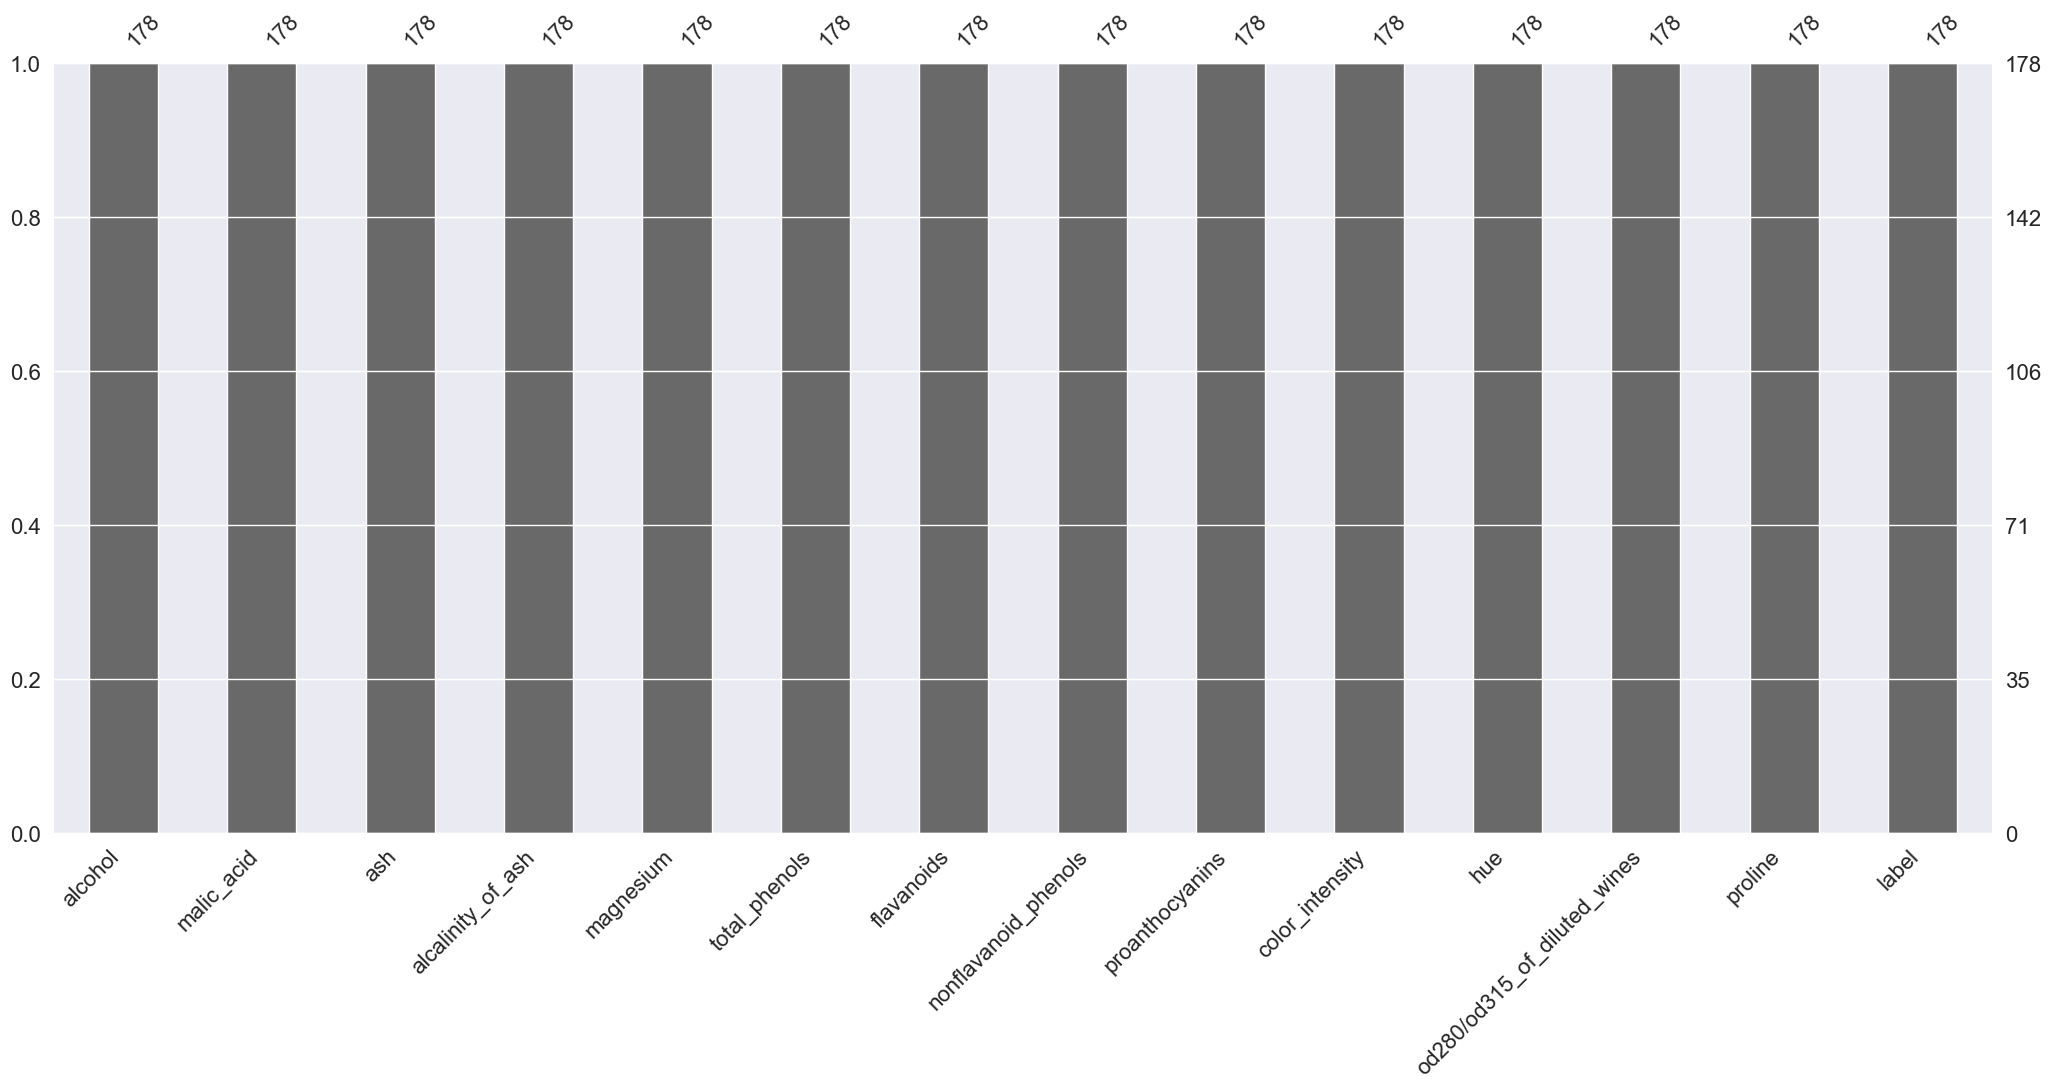

In [33]:
# comprobar valores nulos / faltantes
df.info()
import missingno as msno
msno.bar(df)

Para verificar la correlación entre características, también trazaremos un mapa de calor de las correlaciones lineales (dataframe.corr())

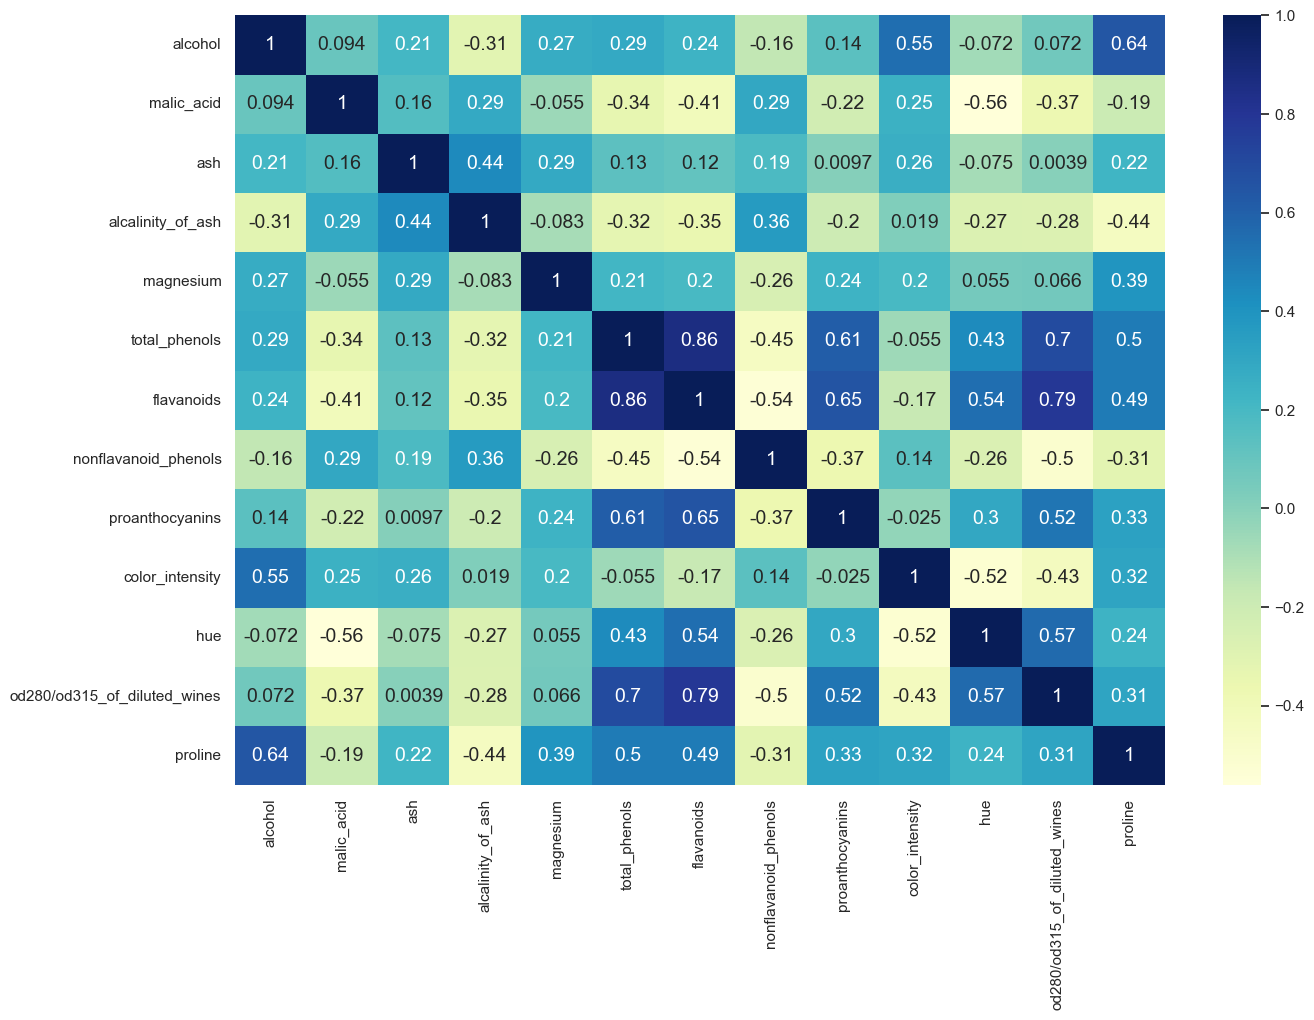

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(df.iloc[:,:-1].corr(), annot=True, cmap="YlGnBu",  annot_kws={"size": 14}, cbar_kws={"shrink": 1})
plt.show()

Algunas características tienen una correlación lineal bastante alta: 
1. flavanoids / total phenols 0.86
2. flavanoids / od280/od315_of_diluted_wines 0.79

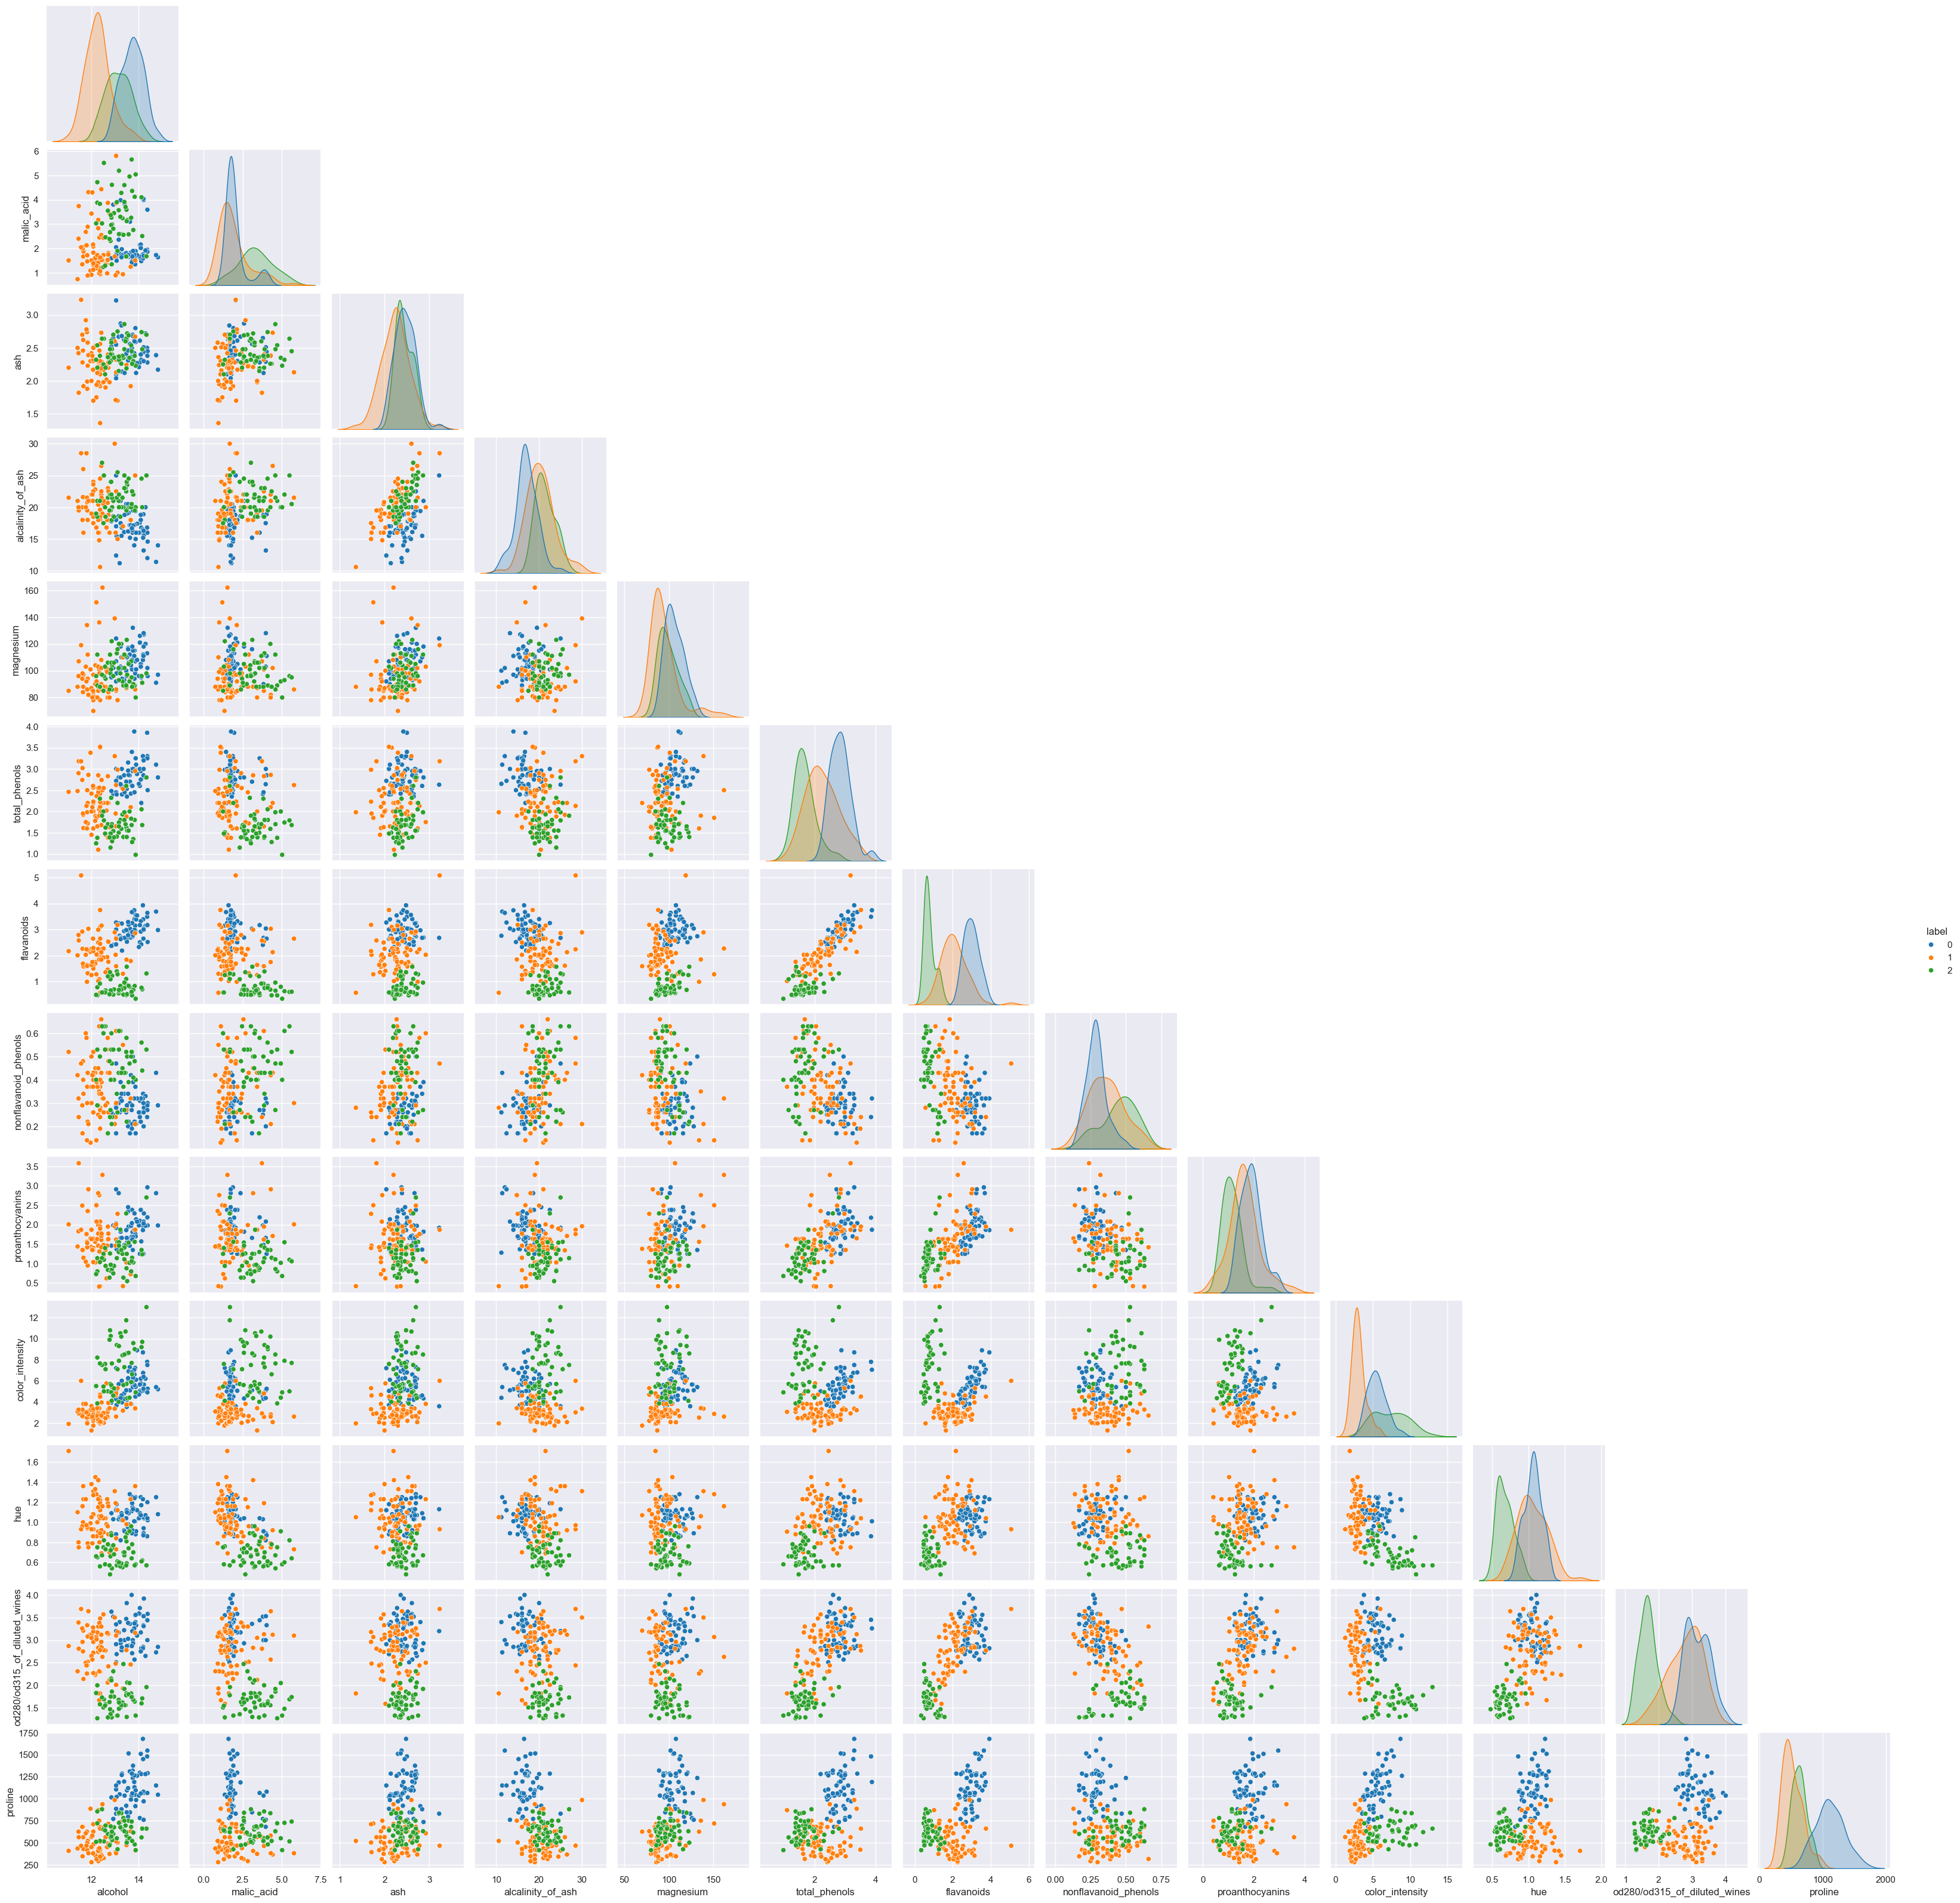

In [35]:
sns.pairplot(df, 
             hue='label', 
             palette="tab10", 
             corner=True)

plt.show()

In [36]:
df.describe().loc[['min', 'max']].T

,min,max
alcohol,11.03,14.83
malic_acid,0.74,5.80
ash,1.36,3.23
alcalinity_of_ash,10.60,30.00
magnesium,70.00,162.00
total_phenols,0.98,3.88
flavanoids,0.34,5.08
nonflavanoid_phenols,0.13,0.66
proanthocyanins,0.41,3.58
color_intensity,1.28,13.00


In [37]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, [6, 12]].values
y = df['label'].values

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=17)

print(f'X_train shape: {x_train.shape}, y_train shape: {y_train.shape},\n'
      f'X_test shape: {x_test.shape}, y_test shape: {y_test.shape}')


X_train shape: (133, 2), y_train shape: (133,),
X_test shape: (45, 2), y_test shape: (45,)


In [38]:
import numpy as np

x_train_concat = np.concatenate((x_train, y_train.reshape(133, 1)), axis=1) # Esta llamada a la función concatenar combina las matrices x_train e y_train.reshape(112, 1) a lo largo del segundo eje (horizontalmente).
x_test_concat = np.concatenate((x_test, y_test.reshape(45, 1)), axis=1)
print(f'X_train shape: {x_train_concat.shape},\n'
      f'X_test shape: {x_test_concat.shape}')

X_train shape: (133, 3),
X_test shape: (45, 3)


In [39]:
pd.DataFrame(x_train_concat).head(10)

,0,1,2
0,0.70,675.0,2.0
1,2.01,434.0,1.0
2,1.84,315.0,1.0
3,2.64,1020.0,0.0
4,3.56,1095.0,0.0
5,0.68,840.0,2.0
6,1.58,630.0,1.0
7,3.75,660.0,1.0
8,0.60,590.0,2.0
9,1.60,495.0,1.0


**The naive Bayesian Classifier**

In [40]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [41]:
nb_model = nb.fit(x_train, y_train)
nb_predictions = nb.predict(x_test)
nb_predictions

array([1, 1, 1, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2,
       0, 2, 1, 1, 0, 1, 2, 1, 2, 2, 0, 0, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2,
       2])

In [42]:
accuracy = nb.score(x_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9333333333333333


**Decision trees**

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [44]:
dtc_model = dtc.fit(x_train, y_train)

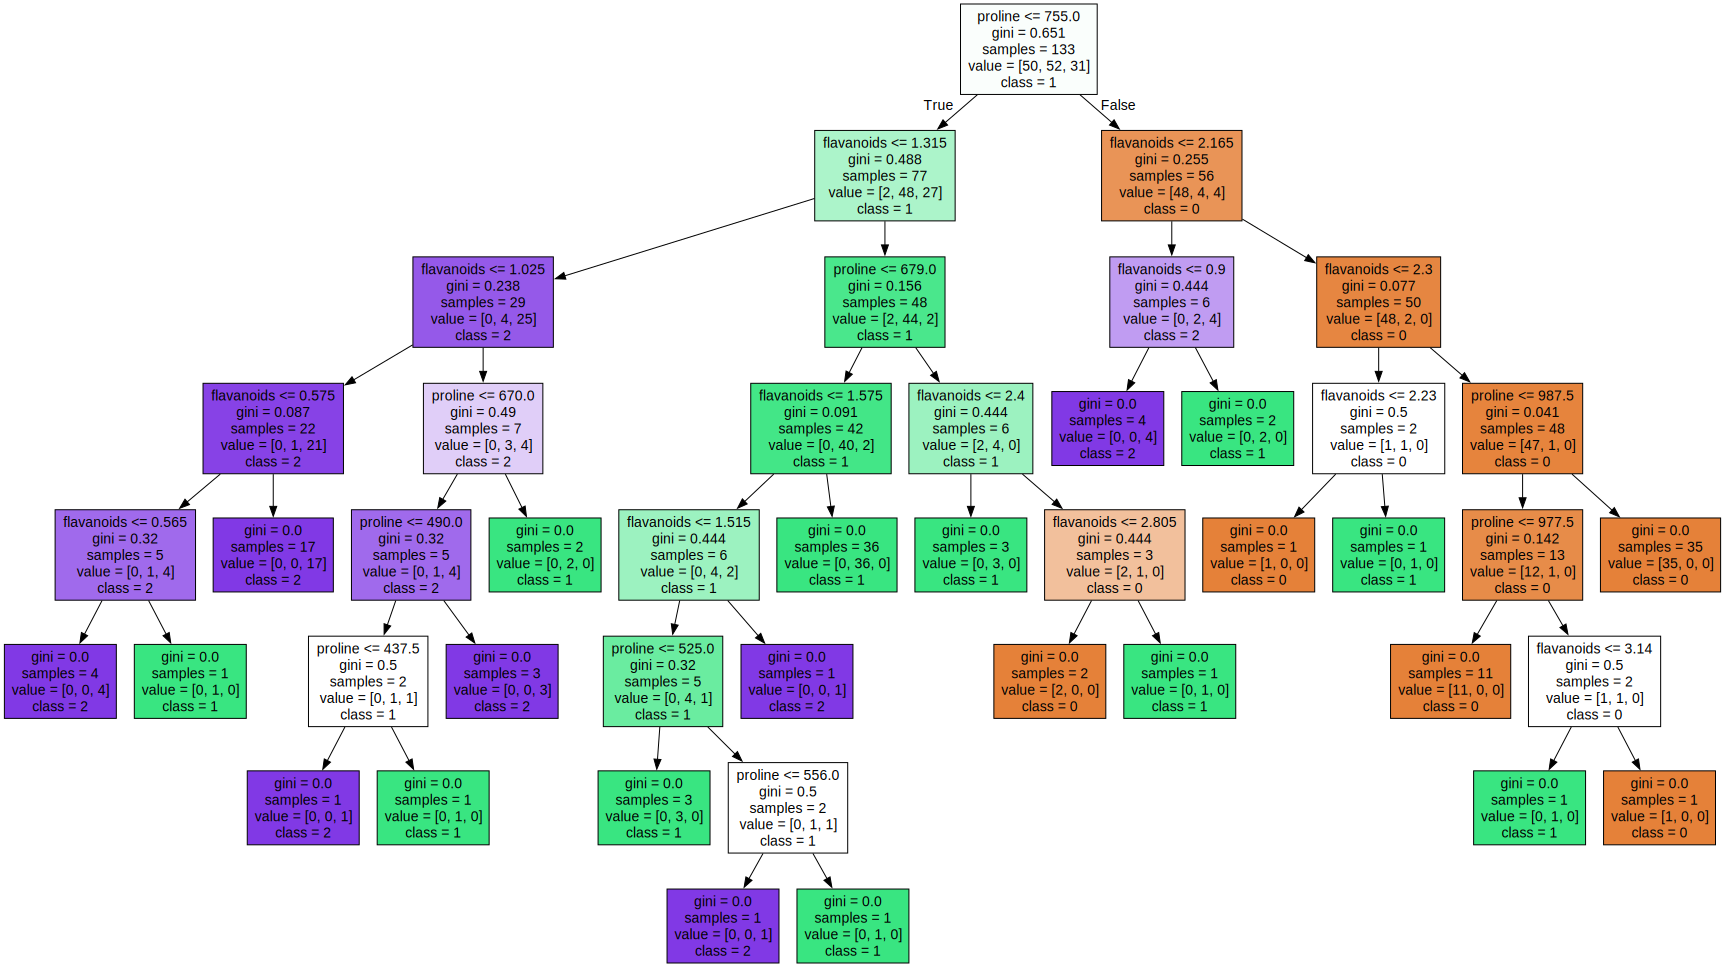

In [45]:
from sklearn import tree
import graphviz

def print_graph(data, feature_names, class_names):
    dot_data = tree.export_graphviz(data, out_file=None,
                                    feature_names=feature_names,  
                                    class_names=class_names,  
                                    filled=True)  
    return graphviz.Source(dot_data)  


feature_names = df.columns[[6, 12]].tolist()
class_names = df['label'].unique().astype(str).tolist()

print_graph(dtc_model, feature_names, class_names)



In [46]:
dtc_predictions = dtc.predict(x_test)

In [47]:
accuracy = dtc.score(x_test, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8888888888888888


**kNN**

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [49]:
knn_model = knn.fit(x_train, y_train)

knn_predictions = knn.predict(x_test)
knn_predictions

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1,
       1])

In [50]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, knn_predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6444444444444445


Conclusión: el mejor método para clasificar un DataSet dado con las características seleccionadas es ingenuo Bayesiano con precisión : 0.9333333333333333

*Veamos el ejemplo del algoritmo de regresión logística y el método de vectores de soporte, cómo trabajar con diferentes métodos de clasificación multiclase.*

In [51]:
wine_data = load_wine()
X = wine_data.data[:, [9, 11, 12]]  # Solo usamos signos con índices 9, 11 y 12
y = wine_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)